In [0]:
import os, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from google.colab import drive
drive.mount('/content/Data_Science')
import urllib.request, urllib.parse, urllib.error

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/Data_Science


In [0]:
data_list=pd.read_csv('Data_Science/My Drive/Data_Science/Data_Entry_2017.csv')
data_list.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [0]:
data_list = data_list.iloc[:, [0,1]]#in iloc we define column index through numbers while in loc we define column index through names

In [0]:
data_list.describe()

,Image Index,Finding Labels
count,112120,112120
unique,112120,836
top,00021591_000.png,No Finding
freq,1,60361


In [0]:
counts=data_list.groupby(['Finding Labels']).agg({'Image Index':'count'})
counts.sort_values('Image Index',ascending=False,inplace=True)
counts

,Image Index
Finding Labels,
No Finding,60361
Infiltration,9547
Atelectasis,4215
Effusion,3955
Nodule,2705
...,...
Atelectasis|Edema|Pneumonia,1
Edema|Effusion|Pleural_Thickening|Pneumonia|Pneumothorax,1
Edema|Effusion|Pleural_Thickening|Pneumonia,1


In [0]:
counts=data_list['Finding Labels'].value_counts()[:10]#it will take first ten highest occured values and then sort it
counts.sort_values(ascending=True,inplace=True)
counts

Consolidation                1310
Atelectasis|Infiltration     1350
Effusion|Infiltration        1603
Mass                         2139
Pneumothorax                 2194
Nodule                       2705
Effusion                     3955
Atelectasis                  4215
Infiltration                 9547
No Finding                  60361
Name: Finding Labels, dtype: int64

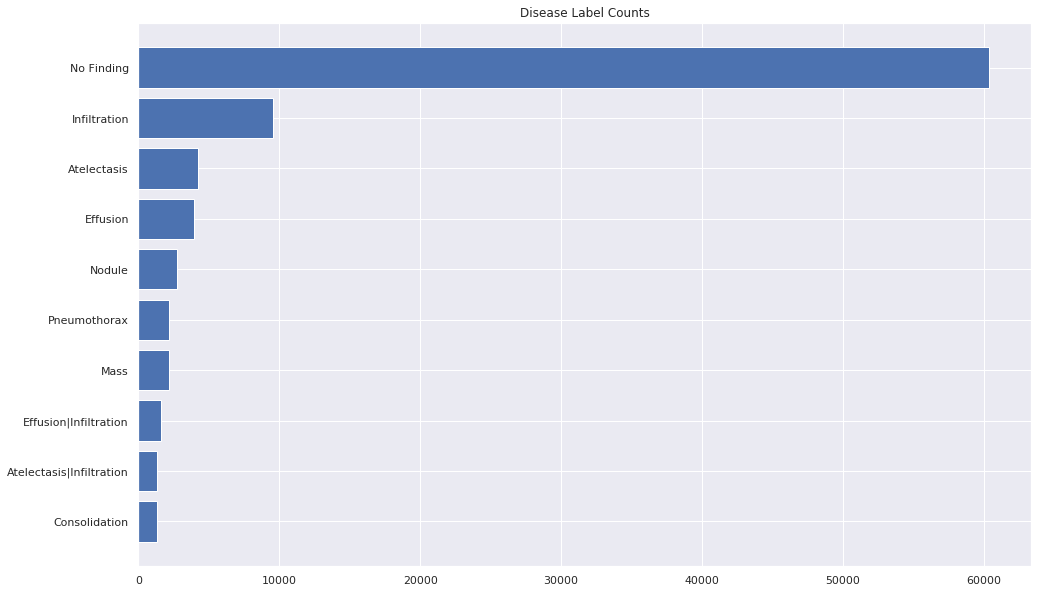

In [0]:
plt.figure(figsize=(16,10))
plt.barh(y=counts.index, width=counts.values)#making a horizontal bar plot
plt.title('Disease Label Counts')
plt.show()

In [0]:
#DATA SEGREGATION

In [0]:
disease_list=data_list[data_list['Finding Labels']!='No Finding']
# print(disease_list)
nondisease_list=data_list[data_list['Finding Labels']=='No Finding'].sample(2000,random_state=0)
# print(nondisease_list)

In [0]:
data_list=pd.concat([disease_list,nondisease_list],axis=0)
data_list.sort_index(inplace=True)

In [0]:
len(data_list)

53759

In [0]:
X_train,X_test,y_train,y_test=train_test_split(data_list['Image Index'],data_list['Finding Labels'],test_size=0.05,random_state=0)

In [0]:
data_train=pd.concat([X_test,X_train],axis=1)
data_test=pd.concat([y_test,y_train],axis=1)

In [0]:
#SEGREGATING DATA

In [0]:
# Download the 56 zip files in Images_png in batches
import urllib.request, urllib.parse, urllib.error

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading', fn, '...')
    urllib.request.urlretrieve(link, fn)  # download the zip file
print("Download complete.")

downloading images_01.tar.gz ...
downloading images_02.tar.gz ...
downloading images_03.tar.gz ...
downloading images_04.tar.gz ...
downloading images_05.tar.gz ...
downloading images_06.tar.gz ...
downloading images_07.tar.gz ...
downloading images_08.tar.gz ...
downloading images_09.tar.gz ...
downloading images_10.tar.gz ...
Download complete.


In [0]:
import tarfile
nums = ['01','02','03','04','05','06','07','08','09','10']
file_names = ['images_{}.tar.gz'.format(x) for x in nums]
for idx, file in enumerate(file_names):#idx is just giving numbers ,we want to extract files only
    with tarfile.open(file, 'r:gz') as tar: 
        print(idx,': Extracting all the files now...') 
        tar.extractall() 
        print(idx,': Done!') 

0 : Extracting all the files now...
0 : Done!
1 : Extracting all the files now...
1 : Done!
2 : Extracting all the files now...
2 : Done!
3 : Extracting all the files now...
3 : Done!
4 : Extracting all the files now...
4 : Done!
5 : Extracting all the files now...
5 : Done!
6 : Extracting all the files now...
6 : Done!
7 : Extracting all the files now...
7 : Done!
8 : Extracting all the files now...
8 : Done!
9 : Extracting all the files now...
9 : Done!


In [0]:
#Data Preprocessing

In [0]:
import os, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
import cv2
from keras.preprocessing import image
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# !pip install tensorflow==1.4.0

Using TensorFlow backend.


1.15.0


In [0]:
data=pd.read_csv('Data_Science/My Drive/Data_Science/Data_Entry_2017.csv')
df_dir = '/content/'
img_dir = '/content/images/'
df_dir

'/content/'

In [0]:
# Defining functions for data preprocessing and segregation

In [0]:
# THis is for infiltration only that is where there is infiltration it will return that
# or elese where no finding it will return that ,REST ALL IT WILL MAKE AS UNKNOWN
def data_preprocess(data):
    
    def unknown(x):
        
        if  x == 'Infiltration' or x == 'Cardiomegaly' or x == 'Consolidation' or x == 'Edema' or x == 'Effusion' or x == 'Emphysema' or x == 'Fibrosis' or x == 'Hernia' or x == 'Mass' or x == 'Atelectasis' or x == 'Nodule' or x == 'Pleural_Thickening' or x == 'Pneumonia' or x == 'Pneumothorax':
            return x
        else:
            return 'Unknown'
    
    data = data.loc[:,['Image Index','Finding Labels']]
    
    data['Finding Labels'] = data['Finding Labels'].apply(unknown)

    data = data[data['Finding Labels'] != 'Unknown']#removing unknowns
    data.rename(columns={'Image Index':'images','Finding Labels':'labels'}, 
                inplace=True)
    # print(data)
    return data

In [0]:
data_preprocess(data)

,images,labels
0,00000001_000.png,Cardiomegaly
4,00000003_000.png,Hernia
5,00000003_001.png,Hernia
6,00000003_002.png,Hernia
8,00000003_004.png,Hernia
...,...,...
112084,00030780_000.png,Atelectasis
112090,00030786_000.png,Effusion
112096,00030786_006.png,Consolidation
112100,00030789_000.png,Infiltration


In [0]:
def get_path(img_name, dir):
    return [dir+x for x in img_name]

In [0]:
def data_segregation(data):
    data = data_preprocess(data)
    
    data['path'] = get_path(data['images'], img_dir)
    
    data, data_test = train_test_split(data, test_size=0.1, random_state=0)
    
    return data, data_test

In [0]:
data_segregation(data)

(                  images              labels                              path
 100831  00026785_014.png         Atelectasis  /content/images/00026785_014.png
 83980   00020648_001.png         Atelectasis  /content/images/00020648_001.png
 64464   00015911_009.png         Atelectasis  /content/images/00015911_009.png
 27430   00007138_006.png         Atelectasis  /content/images/00007138_006.png
 43716   00011255_010.png        Pneumothorax  /content/images/00011255_010.png
 ...                  ...                 ...                               ...
 49710   00012620_012.png            Effusion  /content/images/00012620_012.png
 73569   00018094_001.png  Pleural_Thickening  /content/images/00018094_001.png
 37375   00009863_020.png        Infiltration  /content/images/00009863_020.png
 40873   00010590_004.png         Atelectasis  /content/images/00010590_004.png
 10050   00002604_000.png  Pleural_Thickening  /content/images/00002604_000.png
 
 [27866 rows x 3 columns],
           

In [0]:
data2, data_test = data_segregation(data)

In [0]:
# Function for listing positive counts of each class

In [0]:
def pos_counts(data):
    dis_dict = {}
    labels = data.labels.value_counts()
    for id, i in enumerate(labels.index):
        dis_dict[i] = labels.values[id]
        
    return dis_dict

In [0]:
dis_dict = pos_counts(data2)
dis_dict

{'Atelectasis': 3786,
 'Cardiomegaly': 982,
 'Consolidation': 1187,
 'Edema': 570,
 'Effusion': 3588,
 'Emphysema': 791,
 'Fibrosis': 657,
 'Hernia': 93,
 'Infiltration': 8582,
 'Mass': 1918,
 'Nodule': 2445,
 'Pleural_Thickening': 1013,
 'Pneumonia': 286,
 'Pneumothorax': 1968}

In [0]:
cats_list = list(dis_dict.keys())
cats_list

['Infiltration',
 'Atelectasis',
 'Effusion',
 'Nodule',
 'Pneumothorax',
 'Mass',
 'Consolidation',
 'Pleural_Thickening',
 'Cardiomegaly',
 'Emphysema',
 'Fibrosis',
 'Edema',
 'Pneumonia',
 'Hernia']

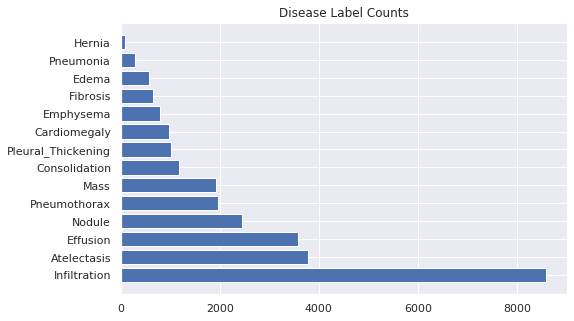

In [0]:
# Plotting label counts
plt.figure(figsize=(8,5))
plt.barh(y=list(dis_dict.keys()), 
         width=list(dis_dict.values()))
plt.title('Disease Label Counts')
plt.show()

In [0]:
# Data Augmentation

In [0]:
# shutil.rmtree('aug_images')#if we want to remove any directories if present
os.mkdir('aug_images')#or else we will create a new directory

In [0]:
def data_augment(id,label):    
    
    print('Generating data for',label)
    num=4000
    df = data2[data2['labels'] == label]
    df_length = len(df)
    
    cnt = 0
    file_name = []
    file_label = []
    file_path = []
    dir = '/content/aug_images/'
        
    img_gen = image.ImageDataGenerator(horizontal_flip=True,
                                       vertical_flip=False,
                                       rotation_range=5,#rotation by 5 degree
                                       shear_range=0.1,#Shear Intensity (Shear angle in counter-clockwise direction in degrees)
                                       fill_mode='reflect',#Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode
                                       #This mode creates a ‘reflection’ and fills the empty values in a reverse order of the known values.
                                       zoom_range=0.15)
    
    aug_gen = img_gen.flow_from_dataframe(dataframe=df, 
                                     directory=None, 
                                     x_col='path',
                                     y_col='labels',
                                     target_size=(224,224),
                                     color_mode='rgb',
                                     class_mode='input',
                                     batch_size=num, seed=0)

    for i in range(5):
        
        X, Y = next(aug_gen)
        
        for x, y in zip(X, Y):
            img_name = 'a{}_{}.png'.format(id, cnt)
            file_name.append(img_name)
            file_label.append(label)
            file_path.append(dir+img_name)

            image.save_img(dir+img_name, x)
            cnt += 1
        
    aug_df = pd.DataFrame({'images':file_name, 
                           'labels':file_label,
                           'path':file_path})
    print(aug_df)
    print(len(aug_df),'images generated')
    
    return aug_df 

In [0]:
count=1
data_net=[]
for labels in ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 
              'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']:
              dfs = [data_augment(id=count,label=labels)]
              data = pd.concat(dfs, axis=0)
              data_net.append(data)
              count=count+1

Generating data for Atelectasis
Found 3255 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 531 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


             images       labels                              path
0          a1_0.png  Atelectasis      /content/aug_images/a1_0.png
1          a1_1.png  Atelectasis      /content/aug_images/a1_1.png
2          a1_2.png  Atelectasis      /content/aug_images/a1_2.png
3          a1_3.png  Atelectasis      /content/aug_images/a1_3.png
4          a1_4.png  Atelectasis      /content/aug_images/a1_4.png
...             ...          ...                               ...
16270  a1_16270.png  Atelectasis  /content/aug_images/a1_16270.png
16271  a1_16271.png  Atelectasis  /content/aug_images/a1_16271.png
16272  a1_16272.png  Atelectasis  /content/aug_images/a1_16272.png
16273  a1_16273.png  Atelectasis  /content/aug_images/a1_16273.png
16274  a1_16274.png  Atelectasis  /content/aug_images/a1_16274.png

[16275 rows x 3 columns]
16275 images generated
Generating data for Consolidation


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 177 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 1010 validated image filenames.
           images         labels                             path
0        a2_0.png  Consolidation     /content/aug_images/a2_0.png
1        a2_1.png  Consolidation     /content/aug_images/a2_1.png
2        a2_2.png  Consolidation     /content/aug_images/a2_2.png
3        a2_3.png  Consolidation     /content/aug_images/a2_3.png
4        a2_4.png  Consolidation     /content/aug_images/a2_4.png
...           ...            ...                              ...
5045  a2_5045.png  Consolidation  /content/aug_images/a2_5045.png
5046  a2_5046.png  Consolidation  /content/aug_images/a2_5046.png
5047  a2_5047.png  Consolidation  /content/aug_images/a2_5047.png
5048  a2_5048.png  Consolidation  /content/aug_images/a2_5048.png
5049  a2_5049.png  Consolidation  /content/aug_images/a2_5049.png

[5050 rows x 3 columns]
5050 images generated
Generating data for Infiltration


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1691 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 6891 validated image filenames.
             images        labels                              path
0          a3_0.png  Infiltration      /content/aug_images/a3_0.png
1          a3_1.png  Infiltration      /content/aug_images/a3_1.png
2          a3_2.png  Infiltration      /content/aug_images/a3_2.png
3          a3_3.png  Infiltration      /content/aug_images/a3_3.png
4          a3_4.png  Infiltration      /content/aug_images/a3_4.png
...             ...           ...                               ...
17777  a3_17777.png  Infiltration  /content/aug_images/a3_17777.png
17778  a3_17778.png  Infiltration  /content/aug_images/a3_17778.png
17779  a3_17779.png  Infiltration  /content/aug_images/a3_17779.png
17780  a3_17780.png  Infiltration  /content/aug_images/a3_17780.png
17781  a3_17781.png  Infiltration  /content/aug_images/a3_17781.png

[17782 rows x 3 columns]
17782 images generated
Generating data for Pneumothorax


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 402 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 1566 validated image filenames.
           images        labels                             path
0        a4_0.png  Pneumothorax     /content/aug_images/a4_0.png
1        a4_1.png  Pneumothorax     /content/aug_images/a4_1.png
2        a4_2.png  Pneumothorax     /content/aug_images/a4_2.png
3        a4_3.png  Pneumothorax     /content/aug_images/a4_3.png
4        a4_4.png  Pneumothorax     /content/aug_images/a4_4.png
...           ...           ...                              ...
7825  a4_7825.png  Pneumothorax  /content/aug_images/a4_7825.png
7826  a4_7826.png  Pneumothorax  /content/aug_images/a4_7826.png
7827  a4_7827.png  Pneumothorax  /content/aug_images/a4_7827.png
7828  a4_7828.png  Pneumothorax  /content/aug_images/a4_7828.png
7829  a4_7829.png  Pneumothorax  /content/aug_images/a4_7829.png

[7830 rows x 3 columns]
7830 images generated
Generating data for Edema
Found 502 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 68 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


           images labels                             path
0        a5_0.png  Edema     /content/aug_images/a5_0.png
1        a5_1.png  Edema     /content/aug_images/a5_1.png
2        a5_2.png  Edema     /content/aug_images/a5_2.png
3        a5_3.png  Edema     /content/aug_images/a5_3.png
4        a5_4.png  Edema     /content/aug_images/a5_4.png
...           ...    ...                              ...
2505  a5_2505.png  Edema  /content/aug_images/a5_2505.png
2506  a5_2506.png  Edema  /content/aug_images/a5_2506.png
2507  a5_2507.png  Edema  /content/aug_images/a5_2507.png
2508  a5_2508.png  Edema  /content/aug_images/a5_2508.png
2509  a5_2509.png  Edema  /content/aug_images/a5_2509.png

[2510 rows x 3 columns]
2510 images generated
Generating data for Emphysema
Found 667 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 124 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


           images     labels                             path
0        a6_0.png  Emphysema     /content/aug_images/a6_0.png
1        a6_1.png  Emphysema     /content/aug_images/a6_1.png
2        a6_2.png  Emphysema     /content/aug_images/a6_2.png
3        a6_3.png  Emphysema     /content/aug_images/a6_3.png
4        a6_4.png  Emphysema     /content/aug_images/a6_4.png
...           ...        ...                              ...
3330  a6_3330.png  Emphysema  /content/aug_images/a6_3330.png
3331  a6_3331.png  Emphysema  /content/aug_images/a6_3331.png
3332  a6_3332.png  Emphysema  /content/aug_images/a6_3332.png
3333  a6_3333.png  Emphysema  /content/aug_images/a6_3333.png
3334  a6_3334.png  Emphysema  /content/aug_images/a6_3334.png

[3335 rows x 3 columns]
3335 images generated
Generating data for Fibrosis
Found 624 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 33 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


           images    labels                             path
0        a7_0.png  Fibrosis     /content/aug_images/a7_0.png
1        a7_1.png  Fibrosis     /content/aug_images/a7_1.png
2        a7_2.png  Fibrosis     /content/aug_images/a7_2.png
3        a7_3.png  Fibrosis     /content/aug_images/a7_3.png
4        a7_4.png  Fibrosis     /content/aug_images/a7_4.png
...           ...       ...                              ...
3115  a7_3115.png  Fibrosis  /content/aug_images/a7_3115.png
3116  a7_3116.png  Fibrosis  /content/aug_images/a7_3116.png
3117  a7_3117.png  Fibrosis  /content/aug_images/a7_3117.png
3118  a7_3118.png  Fibrosis  /content/aug_images/a7_3118.png
3119  a7_3119.png  Fibrosis  /content/aug_images/a7_3119.png

[3120 rows x 3 columns]
3120 images generated
Generating data for Effusion
Found 3011 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 577 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


             images    labels                              path
0          a8_0.png  Effusion      /content/aug_images/a8_0.png
1          a8_1.png  Effusion      /content/aug_images/a8_1.png
2          a8_2.png  Effusion      /content/aug_images/a8_2.png
3          a8_3.png  Effusion      /content/aug_images/a8_3.png
4          a8_4.png  Effusion      /content/aug_images/a8_4.png
...             ...       ...                               ...
15050  a8_15050.png  Effusion  /content/aug_images/a8_15050.png
15051  a8_15051.png  Effusion  /content/aug_images/a8_15051.png
15052  a8_15052.png  Effusion  /content/aug_images/a8_15052.png
15053  a8_15053.png  Effusion  /content/aug_images/a8_15053.png
15054  a8_15054.png  Effusion  /content/aug_images/a8_15054.png

[15055 rows x 3 columns]
15055 images generated
Generating data for Pneumonia
Found 248 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 38 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


           images     labels                             path
0        a9_0.png  Pneumonia     /content/aug_images/a9_0.png
1        a9_1.png  Pneumonia     /content/aug_images/a9_1.png
2        a9_2.png  Pneumonia     /content/aug_images/a9_2.png
3        a9_3.png  Pneumonia     /content/aug_images/a9_3.png
4        a9_4.png  Pneumonia     /content/aug_images/a9_4.png
...           ...        ...                              ...
1235  a9_1235.png  Pneumonia  /content/aug_images/a9_1235.png
1236  a9_1236.png  Pneumonia  /content/aug_images/a9_1236.png
1237  a9_1237.png  Pneumonia  /content/aug_images/a9_1237.png
1238  a9_1238.png  Pneumonia  /content/aug_images/a9_1238.png
1239  a9_1239.png  Pneumonia  /content/aug_images/a9_1239.png

[1240 rows x 3 columns]
1240 images generated
Generating data for Pleural_Thickening
Found 883 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 130 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


            images              labels                              path
0        a10_0.png  Pleural_Thickening     /content/aug_images/a10_0.png
1        a10_1.png  Pleural_Thickening     /content/aug_images/a10_1.png
2        a10_2.png  Pleural_Thickening     /content/aug_images/a10_2.png
3        a10_3.png  Pleural_Thickening     /content/aug_images/a10_3.png
4        a10_4.png  Pleural_Thickening     /content/aug_images/a10_4.png
...            ...                 ...                               ...
4410  a10_4410.png  Pleural_Thickening  /content/aug_images/a10_4410.png
4411  a10_4411.png  Pleural_Thickening  /content/aug_images/a10_4411.png
4412  a10_4412.png  Pleural_Thickening  /content/aug_images/a10_4412.png
4413  a10_4413.png  Pleural_Thickening  /content/aug_images/a10_4413.png
4414  a10_4414.png  Pleural_Thickening  /content/aug_images/a10_4414.png

[4415 rows x 3 columns]
4415 images generated
Generating data for Cardiomegaly
Found 864 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 118 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


            images        labels                              path
0        a11_0.png  Cardiomegaly     /content/aug_images/a11_0.png
1        a11_1.png  Cardiomegaly     /content/aug_images/a11_1.png
2        a11_2.png  Cardiomegaly     /content/aug_images/a11_2.png
3        a11_3.png  Cardiomegaly     /content/aug_images/a11_3.png
4        a11_4.png  Cardiomegaly     /content/aug_images/a11_4.png
...            ...           ...                               ...
4315  a11_4315.png  Cardiomegaly  /content/aug_images/a11_4315.png
4316  a11_4316.png  Cardiomegaly  /content/aug_images/a11_4316.png
4317  a11_4317.png  Cardiomegaly  /content/aug_images/a11_4317.png
4318  a11_4318.png  Cardiomegaly  /content/aug_images/a11_4318.png
4319  a11_4319.png  Cardiomegaly  /content/aug_images/a11_4319.png

[4320 rows x 3 columns]
4320 images generated
Generating data for Nodule
Found 2068 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 377 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


              images  labels                               path
0          a12_0.png  Nodule      /content/aug_images/a12_0.png
1          a12_1.png  Nodule      /content/aug_images/a12_1.png
2          a12_2.png  Nodule      /content/aug_images/a12_2.png
3          a12_3.png  Nodule      /content/aug_images/a12_3.png
4          a12_4.png  Nodule      /content/aug_images/a12_4.png
...              ...     ...                                ...
10335  a12_10335.png  Nodule  /content/aug_images/a12_10335.png
10336  a12_10336.png  Nodule  /content/aug_images/a12_10336.png
10337  a12_10337.png  Nodule  /content/aug_images/a12_10337.png
10338  a12_10338.png  Nodule  /content/aug_images/a12_10338.png
10339  a12_10339.png  Nodule  /content/aug_images/a12_10339.png

[10340 rows x 3 columns]
10340 images generated
Generating data for Mass
Found 1668 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 250 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


            images labels                              path
0        a13_0.png   Mass     /content/aug_images/a13_0.png
1        a13_1.png   Mass     /content/aug_images/a13_1.png
2        a13_2.png   Mass     /content/aug_images/a13_2.png
3        a13_3.png   Mass     /content/aug_images/a13_3.png
4        a13_4.png   Mass     /content/aug_images/a13_4.png
...            ...    ...                               ...
8335  a13_8335.png   Mass  /content/aug_images/a13_8335.png
8336  a13_8336.png   Mass  /content/aug_images/a13_8336.png
8337  a13_8337.png   Mass  /content/aug_images/a13_8337.png
8338  a13_8338.png   Mass  /content/aug_images/a13_8338.png
8339  a13_8339.png   Mass  /content/aug_images/a13_8339.png

[8340 rows x 3 columns]
8340 images generated
Generating data for Hernia
Found 84 validated image filenames.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 9 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


          images  labels                             path
0      a14_0.png  Hernia    /content/aug_images/a14_0.png
1      a14_1.png  Hernia    /content/aug_images/a14_1.png
2      a14_2.png  Hernia    /content/aug_images/a14_2.png
3      a14_3.png  Hernia    /content/aug_images/a14_3.png
4      a14_4.png  Hernia    /content/aug_images/a14_4.png
..           ...     ...                              ...
415  a14_415.png  Hernia  /content/aug_images/a14_415.png
416  a14_416.png  Hernia  /content/aug_images/a14_416.png
417  a14_417.png  Hernia  /content/aug_images/a14_417.png
418  a14_418.png  Hernia  /content/aug_images/a14_418.png
419  a14_419.png  Hernia  /content/aug_images/a14_419.png

[420 rows x 3 columns]
420 images generated


In [0]:
data2 = pd.concat(data_net)
data2.labels.value_counts()

Infiltration          17782
Atelectasis           16275
Effusion              15055
Nodule                10340
Mass                   8340
Pneumothorax           7830
Consolidation          5050
Pleural_Thickening     4415
Cardiomegaly           4320
Emphysema              3335
Fibrosis               3120
Edema                  2510
Pneumonia              1240
Hernia                  420
Name: labels, dtype: int64

In [0]:
dummy_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 
'Cardiomegaly', 'Nodule', 'Mass', 'Hernia'] # taken from paper

# One Hot Encoding of Finding Labels to dummy_labels
for label in dummy_labels:
    data2[label] = data2['labels'].map(lambda result: 1.0 if label in result else 0)
data2.head(20)

,images,labels,path,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,a1_0.png,Atelectasis,/content/aug_images/a1_0.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a1_1.png,Atelectasis,/content/aug_images/a1_1.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a1_2.png,Atelectasis,/content/aug_images/a1_2.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a1_3.png,Atelectasis,/content/aug_images/a1_3.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a1_4.png,Atelectasis,/content/aug_images/a1_4.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,a1_5.png,Atelectasis,/content/aug_images/a1_5.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,a1_6.png,Atelectasis,/content/aug_images/a1_6.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,a1_7.png,Atelectasis,/content/aug_images/a1_7.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,a1_8.png,Atelectasis,/content/aug_images/a1_8.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,a1_9.png,Atelectasis,/content/aug_images/a1_9.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
# Splitting data into train set and validation set

In [0]:
df_train, df_val = train_test_split(data2, test_size = 0.2, random_state = 0)

In [0]:
height = 224
width = 224

In [0]:
# Generating augmented images in batches for training and validation

In [0]:
img_gen = image.ImageDataGenerator(rescale=1./255.,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   rotation_range=20,
                                   zoom_range=0.15
                                  )

In [0]:
train_gen = img_gen.flow_from_dataframe(dataframe=df_train, 
                                        directory=None, 
                                        x_col='path',
                                        y_col='labels',
                                        target_size=(height,width),
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        batch_size=32, seed=0)

val_gen = img_gen.flow_from_dataframe(dataframe=df_val, 
                                        directory=None, 
                                        x_col='path',
                                        y_col='labels',
                                        target_size=(height,width),
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        batch_size=64, seed=0)

Found 80025 validated image filenames belonging to 14 classes.
Found 20007 validated image filenames belonging to 14 classes.


In [0]:

import keras
from keras.applications.densenet import DenseNet121
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam

In [0]:
# Import relevant libraries
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

# Create CNN model
# Will use a combination of convolutional, max pooling, and dropout layers for this purpose
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (224, 224,3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
          
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
          
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3))
model.add(Dropout(0.2))

# add in fully connected dense layers to model, then output classifiction probabilities using a softmax activation function
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(14, activation = 'softmax'))

# compile model, run summary
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 16)      1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 16)        0        

In [0]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=[keras.metrics.binary_accuracy])
history =model.fit_generator(generator=train_gen,
                    validation_data=val_gen,workers = 4,epochs=8)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/8





2501/2501 [==============================] - 4139s 2s/step - loss: 2.3365 - binary_accuracy: 0.9286 - val_loss: 2.3374 - val_binary_accuracy: 0.9286
Epoch 2/8
2501/2501 [==============================] - 4044s 2s/step - loss: 2.3207 - binary_accuracy: 0.9286 - val_loss: 2.3300 - val_binary_accuracy: 0.9286
Epoch 3/8
2501/2501 [==============================] - 4124s 2s/step - loss: 2.2521 - binary_accuracy: 0.9286 - val_loss: 2.4369 - val_binary_accuracy: 0.9286
Epoch 4/8
2501/2501 [==============================] - 4061s 2s/step - loss: 2.2185 - binary_accuracy: 0.9285 - val_loss: 2.4248 - val_binary_accuracy: 0.9286
Epoch 5/8
2501/2501 [==============================] - 4046s 2s/step - loss: 2.1997 - binary_accuracy: 0.9285 - val_loss: 2.3482 - val_binary_accuracy: 0.9286
Epoch 6/8
2501/2501 [==============================] - 4069s 2s/step - loss: 2.1853 - binary_accuracy: 

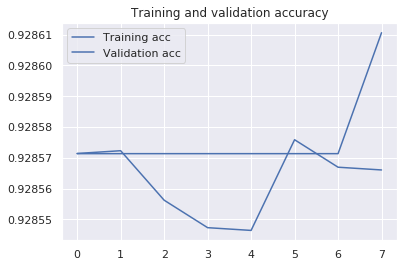

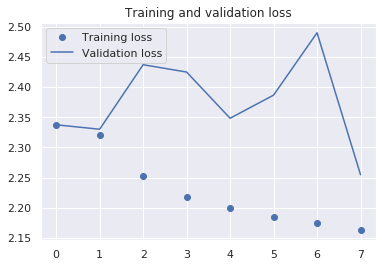

In [0]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
dummy_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 
'Cardiomegaly', 'Nodule', 'Mass', 'Hernia'] # taken from paper

# One Hot Encoding of Finding Labels to dummy_labels
for label in dummy_labels:
    data_test[label] = data_test['labels'].map(lambda result: 1.0 if label in result else 0)
data_test.head(20)

,images,labels,path,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
37054,00009764_002.png,Mass,/content/images/00009764_002.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
105268,00028268_000.png,Infiltration,/content/images/00028268_000.png,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57274,00014203_068.png,Mass,/content/images/00014203_068.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
95423,00025085_002.png,Mass,/content/images/00025085_002.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79879,00019628_000.png,Infiltration,/content/images/00019628_000.png,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58295,00014414_004.png,Infiltration,/content/images/00014414_004.png,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15270,00004001_009.png,Pleural_Thickening,/content/images/00004001_009.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63827,00015754_013.png,Mass,/content/images/00015754_013.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50820,00012863_003.png,Effusion,/content/images/00012863_003.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
81566,00020054_000.png,Effusion,/content/images/00020054_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
test_gen = img_gen.flow_from_dataframe(dataframe=data_test, 
                                        directory=None, 
                                        x_col='path',
                                        y_col='labels',
                                        target_size=(height,width),
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        #classes=cats_list,
                                        batch_size=4096, seed=0)

Found 2606 validated image filenames belonging to 14 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 491 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [0]:
X_test, Y_test = next(test_gen)

In [0]:
test_pred_y = model.predict(X_test, batch_size=32, verbose=True)

2606/2606 [==============================] - 29s 11ms/step


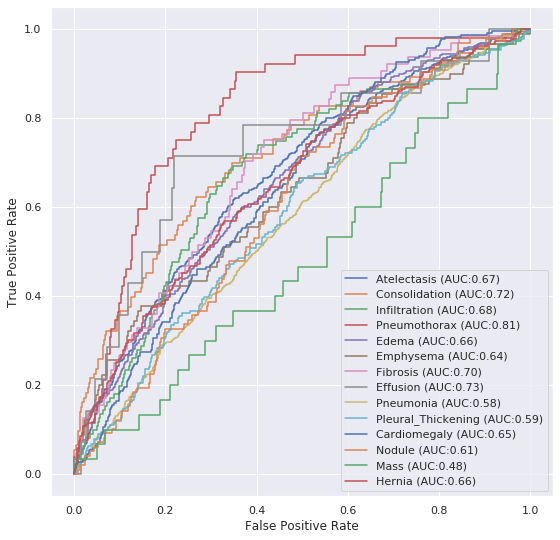

In [0]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (i, label) in enumerate(dummy_labels):
  fpr, tpr, thresholds = roc_curve(Y_test[:,i].astype(int), test_pred_y[:,i])
  c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (label, auc(fpr, tpr)))
  c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('quick_trained_model.png')

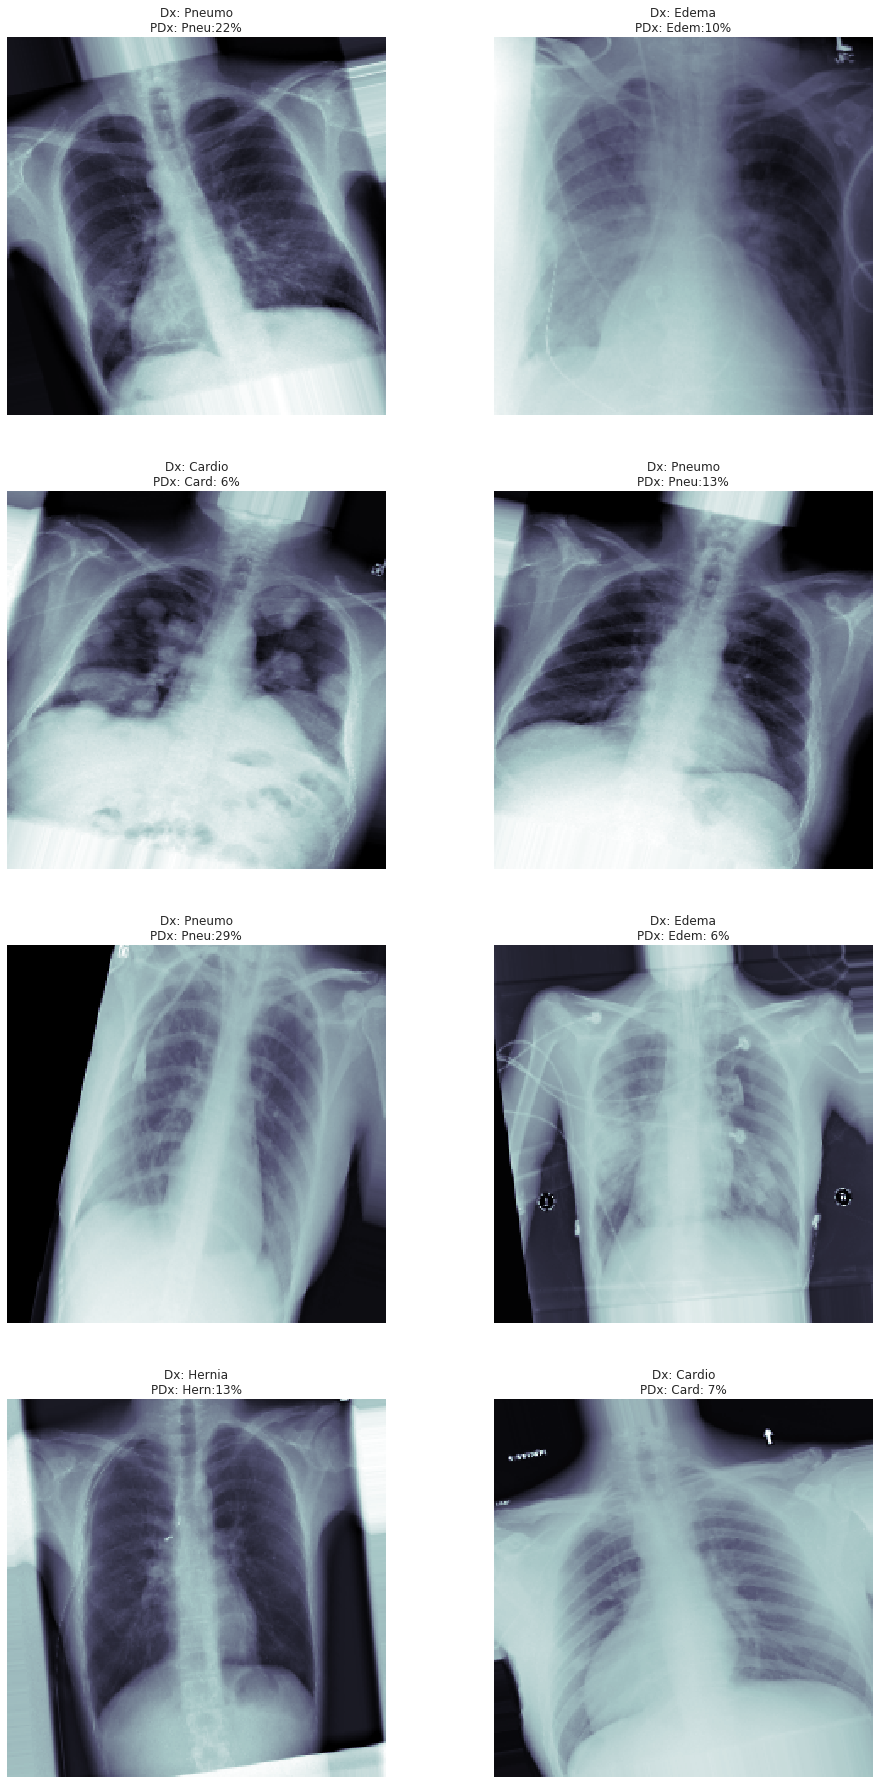

In [0]:
sickest_idx = np.argsort(np.sum(Y_test, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(X_test[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(dummy_labels, Y_test[idx]) if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(dummy_labels, Y_test[idx], test_pred_y[idx]) 
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')